In [3]:
import wandb
api = wandb.Api()
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#%matplotlib gtk3

In [4]:
def get_df_selection(df, key, cond):
    '''Take only elements from the DataFrame where the *key* matches *cond*:bool'''
    elems = []
    for i in range(df.shape[0]):
        try:
            if df['config'][i][key] == cond:
                elems.append(df.loc[i, :])
        except:
            elems.append(df.loc[i, :])
    print(len(elems))
    return pd.DataFrame.from_records(elems)
    
def cumulative_reward(x, verbose=False):
    '''Plots R(n) where R(n) is the same of the graph from 0 to n. Essentially 
    a simple discrete integration.'''
    if verbose:
        print(f"Run length: {len(x)}")
    # Basically ignore faulty runs
    if len(x) == 0:
        return np.zeros(shape=[0,])
    ret = np.zeros([len(x),])
    ret[0] = 0
    for i in range(1, len(x)):
        ret[i] = ret[i-1] + x[i]
    return ret

def plotter(df, keys, f=None):
    '''Basic plotting utility that can apply a function on the data.'''
    f = [f if f else lambda x: x][0]
    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.set_figwidth(16)
    fig.set_figheight(8)
    for ax_idx, ax in enumerate(axes.flatten()):
        for i in range(df.shape[0]):
            data = df[keys[ax_idx]][i]
            steps = df['_step'][i]
            steps = np.linspace(0, steps[-1], len(data))
            ax.plot(steps, f(data))
            ax.set(title=keys[ax_idx], xlabel='steps')#, xlim=[0,1.4e6])
    plt.legend([x for x in df['name']], loc='lower left')
    
def plot_saver(df, key, f=None):
    '''Basic plotting utility that can apply a function on the data.'''        
    ylab = ['Success Rate' if not f else 'Cumulative Success Rate'][0]
    name = ['success_rate.eps' if not f else 'cumul_success_rate.eps'][0]
    f = [f if f else lambda x: x][0]
    fig, ax = plt.subplots()
    fig.set_figwidth(7)
    fig.set_figheight(4)
    for i in range(1, df.shape[0]):
        data = df[key][i]
        steps = df['_step'][i]
        steps = np.linspace(0, steps[-1], len(data))
        ax.plot(steps, f(data), linewidth=2)
        ax.set(title=key, xlabel='steps', ylabel=ylab, xlim=[0,1.4e6])
    fig.savefig(name)

        #plt.legend([x for x in df['name']], loc='lower left')    

32
26
5
5
5
5


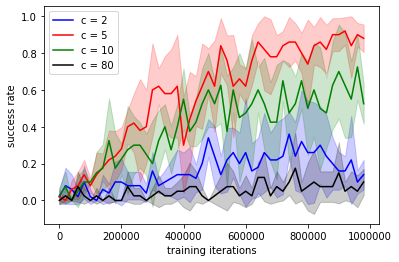

In [5]:
key = 'eval/success_rate'
df = pd.read_pickle('research.pyc')
df = get_df_selection(df, 'offpolicy', 0)
df = get_df_selection(df, 'agent_action_regularizer', 0.0)

length = 50
for c, color in zip([2, 5, 10, 80], ['b', 'r', 'g', 'k']):
    df_current = get_df_selection(df, 'c_step', c)
    results = np.zeros(shape=[1, length])
    for i in range(5):
        run = df_current.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        if run.shape[1] >= length:
            results = np.concatenate([results, run[:, :length]], axis=0) 
    mean = np.mean(results[1:], axis = 0)
    std = np.std(results[1:], axis=0)
    x_range = np.arange(0, length) * 20000
    plt.plot(x_range, mean, color=color)
    plt.fill_between(x_range, mean - std, np.minimum(mean + std, 1.0),
           color=color, alpha=0.2)
plt.xlabel('training iterations')
plt.ylabel('success rate')
plt.legend(['c = 2', 'c = 5', 'c = 10', 'c = 80'])
plt.savefig('timescale_plot.pdf')

32
26
5
6


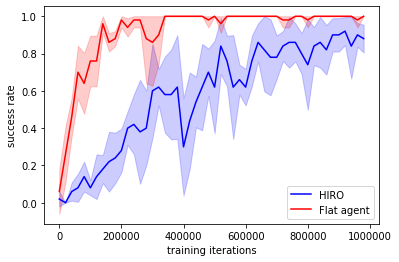

In [6]:
key = 'eval/success_rate'
df = pd.read_pickle('research.pyc')
df = get_df_selection(df, 'offpolicy', 0)
df = get_df_selection(df, 'agent_action_regularizer', 0.0)

length = 50
for c, color in zip([5, 40], ['b', 'r', 'g', 'k']):
    df_current = get_df_selection(df, 'c_step', c)
    results = np.zeros(shape=[1, length])
    for i in range(5):
        run = df_current.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        if run.shape[1] >= length:
            results = np.concatenate([results, run[:, :length]], axis=0) 
    mean = np.mean(results[1:], axis = 0)
    std = np.std(results[1:], axis=0)
    x_range = np.arange(0, length) * 20000
    plt.plot(x_range, mean, color=color)
    plt.fill_between(x_range, mean - std, np.minimum(mean + std, 1.0),
           color=color, alpha=0.2)
plt.xlabel('training iterations')
plt.ylabel('success rate')
plt.legend(['HIRO', 'Flat agent'])
plt.savefig('hiro_vs_flat.pdf')

17
11
17
6


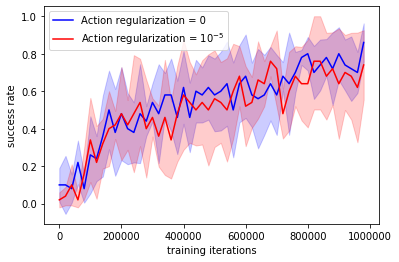

In [7]:
key = 'eval/success_rate'

length = 50
for ac, color in zip([0, 1e-5], ['b', 'r', 'g', 'k']):
    df = pd.read_pickle('research.pyc')
    df_current = get_df_selection(df, 'c_step', 10)
    df_current = get_df_selection(df_current, 'agent_action_regularizer', ac)
    results = np.zeros(shape=[1, length])
    for i in range(5):
        run = df_current.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        if run.shape[1] >= length:
            results = np.concatenate([results, run[:, :length]], axis=0) 
    mean = np.mean(results[1:], axis = 0)
    std = np.std(results[1:], axis=0)
    x_range = np.arange(0, length) * 20000
    plt.plot(x_range, mean, color=color)
    plt.fill_between(x_range, mean - std, np.minimum(mean + std, 1.0),
           color=color, alpha=0.2)
plt.xlabel('training iterations')
plt.ylabel('success rate')
plt.legend(['Action regularization = 0', 'Action regularization = $10^{-5}$'])
plt.savefig('action_regul.pdf')

17
11
17
6


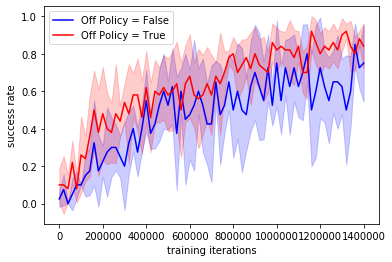

In [44]:
key = 'eval/success_rate'

length = 71
for offpol, color in zip([0, 1], ['b', 'r', 'g', 'k']):
    df = pd.read_pickle('research.pyc')
    df_current = get_df_selection(df, 'c_step', 10)
    df_current = get_df_selection(df_current, 'offpolicy', offpol)
    results = np.zeros(shape=[1, length])
    for i in range(5):
        run = df_current.iloc[i].loc[key]
        run = np.reshape(run, [1, run.shape[0]])
        if run.shape[1] >= length:
            results = np.concatenate([results, run[:, :length]], axis=0) 
    mean = np.mean(results[1:], axis = 0)
    std = np.std(results[1:], axis=0)
    x_range = np.arange(0, length) * 20000
    plt.plot(x_range, mean, color=color)
    plt.fill_between(x_range, mean - std, np.minimum(mean + std, 1.0),
           color=color, alpha=0.2)
plt.xlabel('training iterations')
plt.ylabel('success rate')
plt.legend(['Off Policy = False', 'Off Policy = True'])
plt.savefig('offpol_plot.pdf')

feasible-glitter-4
32
26
5


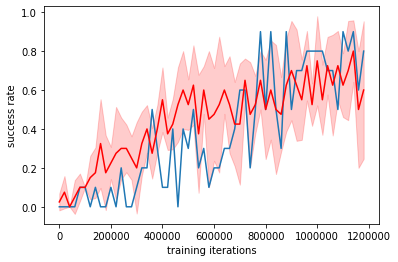

In [78]:
key = 'eval/success_rate'
#df = pd.read_pickle('research.pyc')
df = pd.read_pickle('goal_smoothing.pyc')
#df = get_df_selection(df, 'smooth_factor', 0.5)
length = 60
results = np.zeros(shape=[1, length])
print(df.iloc[0].loc['name'])
for i in range(1):
    run = df.iloc[i].loc[key]
    run = np.reshape(run, [1, run.shape[0]])
    if run.shape[1] >= length:
        results = np.concatenate([results, run[:, :length]], axis=0)
    x_range = np.arange(0, length) * 20000
    plt.plot(x_range, run[0, :length])
mean = np.mean(results[1:], axis = 0)
std = np.std(results[1:], axis=0)
x_range = np.arange(0, length) * 20000
#plt.plot(x_range, mean, color=color)
#plt.fill_between(x_range, mean - std, np.minimum(mean + std, 1.0),
      # color=color, alpha=0.2)
plt.xlabel('training iterations')
plt.ylabel('success rate')

if True:
    df = pd.read_pickle('research.pyc')
    df = get_df_selection(df, 'offpolicy', 0)
    df = get_df_selection(df, 'agent_action_regularizer', 0.0)
    for c, color in zip([10], ['r', 'g', 'k']):
        df_current = get_df_selection(df, 'c_step', c)
        results = np.zeros(shape=[1, length])
        for i in range(5):
            run = df_current.iloc[i].loc[key]
            run = np.reshape(run, [1, run.shape[0]])
            if run.shape[1] >= length:
                results = np.concatenate([results, run[:, :length]], axis=0) 
        mean = np.mean(results[1:], axis = 0)
        std = np.std(results[1:], axis=0)
        x_range = np.arange(0, length) * 20000
        plt.plot(x_range, mean, color=color)
        plt.fill_between(x_range, mean - std, np.minimum(mean + std, 1.0),
               color=color, alpha=0.2)
    plt.xlabel('training iterations')
    plt.ylabel('success rate')
    #plt.legend(['HIRO', 'Flat agent'])
